### **图像膨胀**

* 图像膨胀和腐蚀是相反的过程，本质上就是生成能够将结构元素B全部包含的像素点

In [76]:
# -*- coding:utf-8 -*-
import cv2 as cv
import numpy as np
import sys
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# 设置中文字体
matplotlib.rcParams['font.family'] = 'simhei'
matplotlib.rcParams['axes.unicode_minus'] = False
rootpath = '/home/zomnk/python_ws/02-OpenCV4/images/'

In [77]:
# 分别读取黑背景图像和白背景图像
black = cv.imread(rootpath +'LearnCV_black.png', cv.IMREAD_GRAYSCALE)
if black is None:
    print('Failed to read LearnCV_black.png')
    sys.exit
white = cv.imread(rootpath +'LearnCV_white.png', cv.IMREAD_GRAYSCALE)
if white is None:
    print('Failed to read LearnCV_white.png')
    sys.exit

In [78]:
# 生成待腐蚀图像image
image = np.array([[0, 0, 0, 0, 255, 0], 
                  [0, 255, 255, 255, 255, 255],
                  [0, 255, 255, 255, 255, 0],
                  [0, 255, 255, 255, 255, 0],
                  [0, 255, 255, 255, 255, 0],
                  [0, 0, 0, 0, 0, 0]], dtype='uint8')

In [79]:
# 生成两种结构元素，structure1为矩形结构，structure2为十字结构
structure1 = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))
structure2 = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))

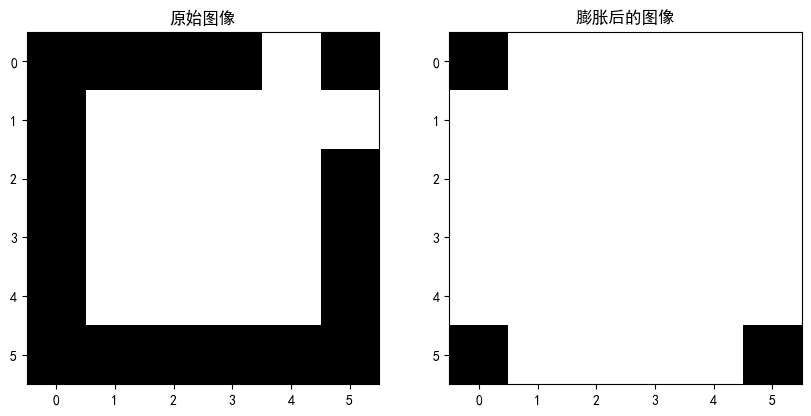

In [80]:
# 对img1进行膨胀
dilate_image = cv.dilate(image, structure2)
# 展示结果
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('原始图像')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('膨胀后的图像')
plt.imshow(dilate_image, cmap='gray')

In [81]:
# 利用矩形元素与十字结构元素分别对黑背景图像和白背景图像进行膨胀
dilate_black_1 = cv.dilate(black, structure1)
dilate_black_2 = cv.dilate(black, structure2)
dilate_white_1 = cv.dilate(white, structure1)
dilate_white_2 = cv.dilate(white, structure2)

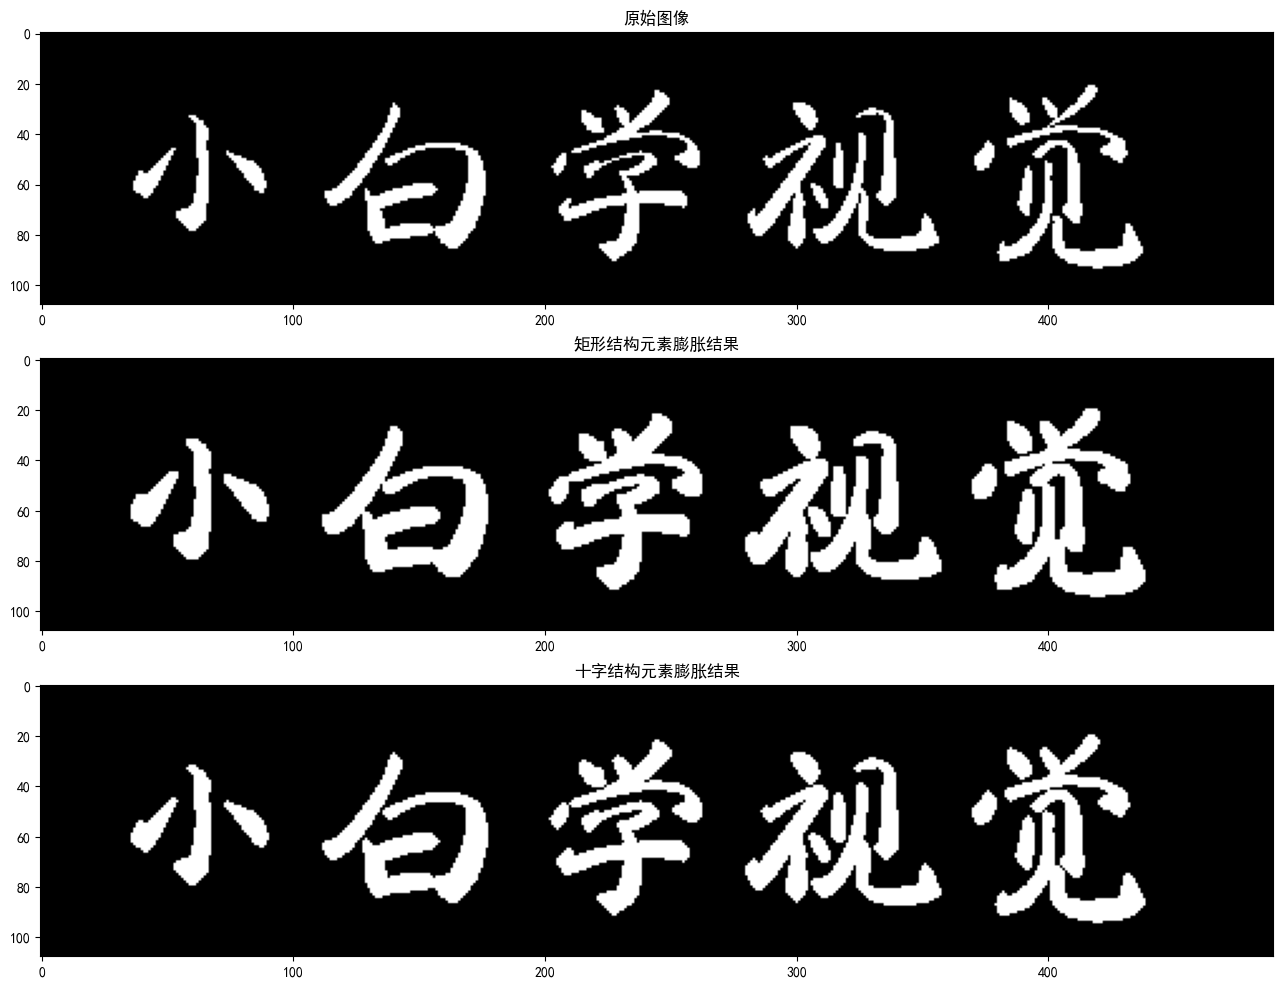

In [82]:
# 展示结果
plt.figure(figsize=(20, 12))
plt.subplot(3, 1, 1)
plt.title('原始图像')
plt.imshow(black, cmap='gray')
plt.subplot(3, 1, 2)
plt.title('矩形结构元素膨胀结果')
plt.imshow(dilate_black_1, cmap='gray')
plt.subplot(3, 1, 3)
plt.title('十字结构元素膨胀结果')
plt.imshow(dilate_black_2, cmap='gray')

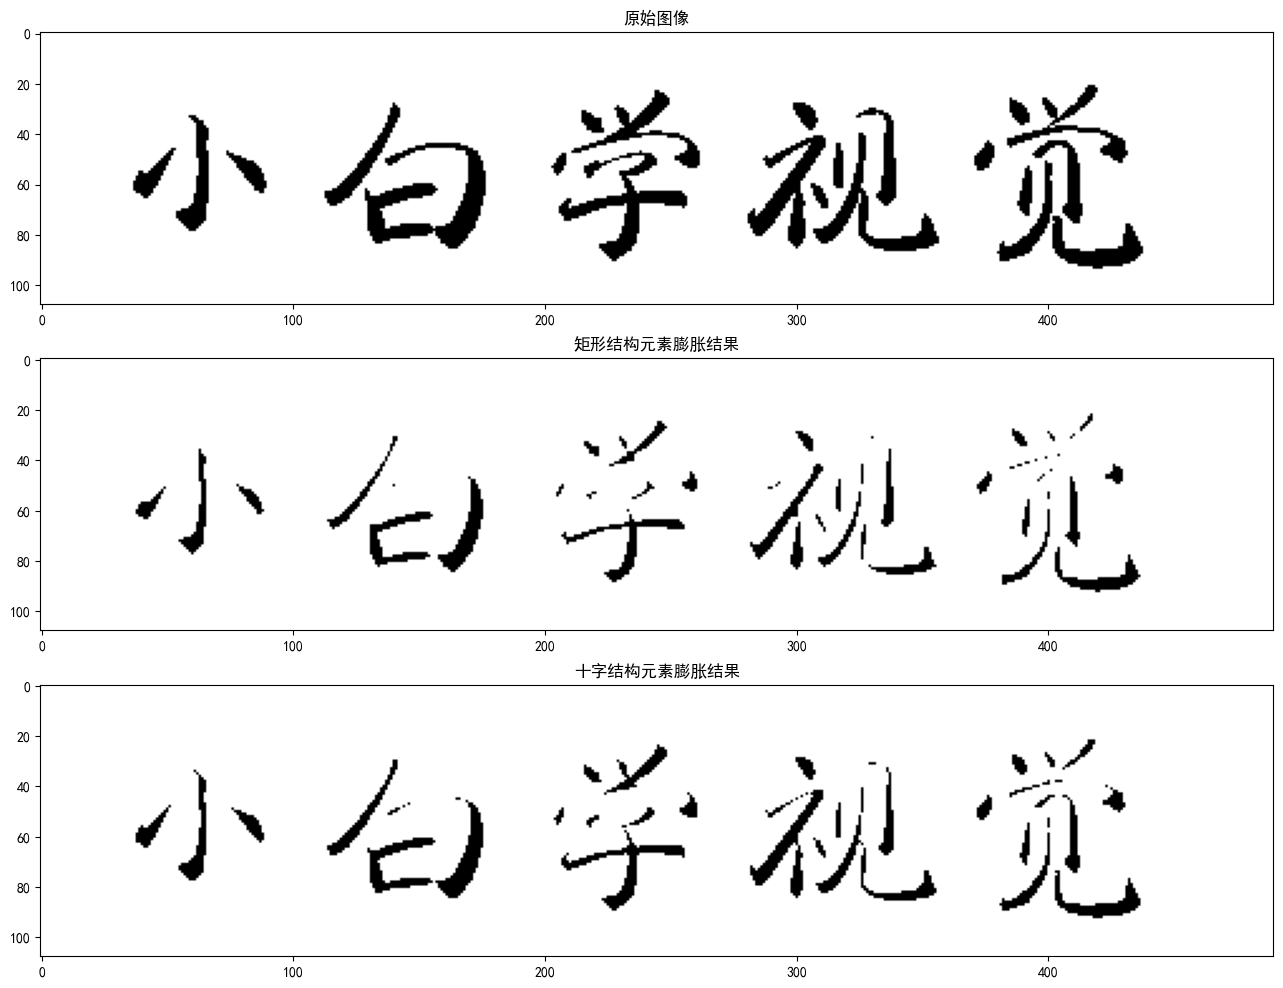

In [83]:
# 展示结果
plt.figure(figsize=(20, 12))
plt.subplot(3, 1, 1)
plt.title('原始图像')
plt.imshow(white, cmap='gray')
plt.subplot(3, 1, 2)
plt.title('矩形结构元素膨胀结果')
plt.imshow(dilate_white_1, cmap='gray')
plt.subplot(3, 1, 3)
plt.title('十字结构元素膨胀结果')
plt.imshow(dilate_white_2, cmap='gray')

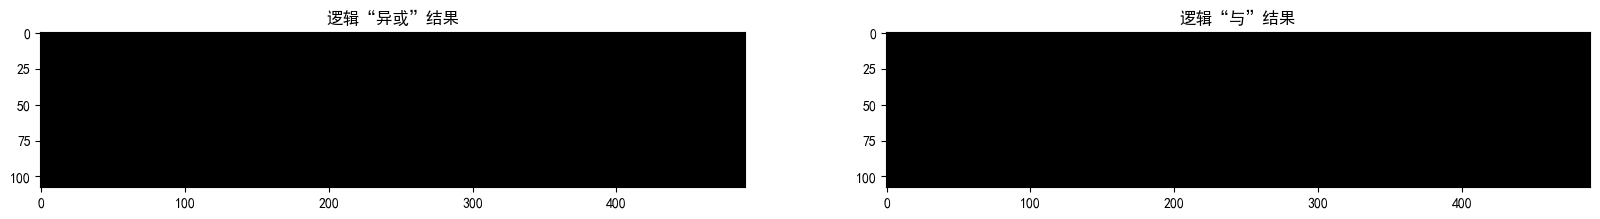

In [84]:
# 比较腐蚀和膨胀的结果
erode_black = cv.erode(black, structure1)
result_xor = cv.bitwise_xor(erode_black, dilate_white_1)
result_and = cv.bitwise_and(erode_black, dilate_white_1)
# 展示结果
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.title('逻辑“异或”结果')
plt.imshow(result_xor, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('逻辑“与”结果')
plt.imshow(result_and, cmap='gray')